In [107]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt

In [108]:
indicatorName=['stockValue','gdp','crime','interestRates','inflation','expense','stockMarket']
indicatorID=['CM.MKT.TRAD.CD','NY.GDP.MKTP.CD','VC.IHR.PSRC.P5','FR.INR.RINR','FP.CPI.TOTL.ZG','GC.XPN.TOTL.GD.ZS','GFDD.DM.02']
countryID=['ZAF','GBR']

yearUK=[2016,2015,2014,2013,2012,2011,2010,2009,2008]
yearSA=[2014,2013,2012,2011,2010,2009,2008,2007,2006]
uk_df=pd.DataFrame({'Year':yearUK})
sa_df=pd.DataFrame({'Year':yearSA})

In [109]:
for index, indicator in enumerate(indicatorName):
    values=[]
    for x in range (3,12):
        baseUrl=f'https://api.worldbank.org/v2/country/{countryID[1]}/indicator/{indicatorID[index]}'
        respFormat='?format=json'
        queryUrl=baseUrl+respFormat
        data=requests.get(queryUrl).json()
        values.append(data[1][x]['value'])
    uk_df[indicator]=values
uk_df=uk_df.sort_values(by=['Year'])

In [110]:
uk_df

,Year,stockValue,gdp,crime,interestRates,inflation,expense,stockMarket
8,2008,2.735563e+12,2.922667e+12,1.2,1.747737,3.521409,39.300196,83.3364
7,2009,NaN,2.410910e+12,1.1,-0.992013,1.961732,41.682568,112.2200
6,2010,NaN,2.475244e+12,1.2,-1.017853,2.492655,42.283512,110.3580
5,2011,NaN,2.659310e+12,1.0,-1.509351,3.856112,41.016964,107.3720
4,2012,NaN,2.704888e+12,1.0,-1.142800,2.573235,41.623446,122.4890
3,2013,NaN,2.786023e+12,0.9,-1.369633,2.291667,39.312691,121.9690
2,2014,NaN,3.063803e+12,0.9,-1.302069,1.451120,38.595590,102.5720
1,2015,NaN,2.928591e+12,1.0,NaN,0.368047,37.691716,75.2899
0,2016,NaN,2.694283e+12,1.2,NaN,1.008417,36.602540,68.1670


In [111]:
for index, indicator in enumerate(indicatorName):
    values=[]
    for x in range (5,14):
        baseUrl=f'https://api.worldbank.org/v2/country/{countryID[0]}/indicator/{indicatorID[index]}'
        respFormat='?format=json'
        queryUrl=baseUrl+respFormat
        data=requests.get(queryUrl).json()
        values.append(data[1][x]['value'])
    sa_df[indicator]=values
sa_df=sa_df.sort_values(by=['Year'])

In [112]:
sa_df

,Year,stockValue,gdp,crime,interestRates,inflation,expense,stockMarket
8,2006,173739710000,2.716385e+11,38.7,4.622282,3.243902,28.907198,30.9360
7,2007,257724510000,2.994155e+11,36.9,3.966276,6.177812,29.012487,38.1719
6,2008,202637450000,2.867698e+11,35.9,5.782784,10.055282,29.959777,51.0189
5,2009,217513740000,2.959365e+11,32.9,3.910359,7.264562,32.244445,70.5167
4,2010,277223790000,3.753494e+11,30.8,3.274340,4.063539,31.783628,75.0691
3,2011,225830990000,4.164189e+11,29.8,2.316453,5.017158,32.320013,70.9019
2,2012,226864050000,3.963327e+11,30.6,3.293253,5.723944,33.081800,70.8051
1,2013,232250440000,3.668294e+11,31.7,2.208786,5.776404,34.701943,61.3544
0,2014,245696620000,3.509046e+11,32.6,3.389954,6.136020,34.321375,53.9658


In [113]:
dataframes=[uk_df,sa_df]

for df in dataframes:
    df['GDP (B)']=round(df['gdp']/1000000000,2)
    df['Intentional Homicides per 100k people']=df['crime']
    df['Interest Rates']=round(df['interestRates'],2)
    df['Inflation Consumer Proces (%)']=df['inflation']
    df['Expense']=df['expense']
    df['Stock Market traded to GDP (%)']=df['stockMarket']
    
uk_df=uk_df.drop(indicatorName,axis=1)
sa_df=sa_df.drop(indicatorName,axis=1)

In [114]:
uk_df

,Year,GDP (B),Intentional Homicides per 100k people,Interest Rates,Inflation Consumer Proces (%),Expense,Stock Market traded to GDP (%)
8,2008,2922.67,1.2,1.75,3.521409,39.300196,83.3364
7,2009,2410.91,1.1,-0.99,1.961732,41.682568,112.2200
6,2010,2475.24,1.2,-1.02,2.492655,42.283512,110.3580
5,2011,2659.31,1.0,-1.51,3.856112,41.016964,107.3720
4,2012,2704.89,1.0,-1.14,2.573235,41.623446,122.4890
3,2013,2786.02,0.9,-1.37,2.291667,39.312691,121.9690
2,2014,3063.80,0.9,-1.30,1.451120,38.595590,102.5720
1,2015,2928.59,1.0,NaN,0.368047,37.691716,75.2899
0,2016,2694.28,1.2,NaN,1.008417,36.602540,68.1670


In [115]:
ukColumns=uk_df.columns
saColumns=sa_df.columns

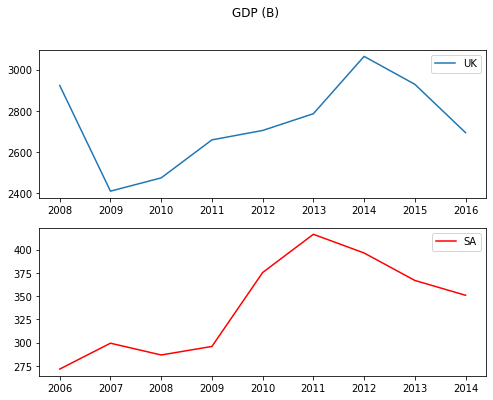

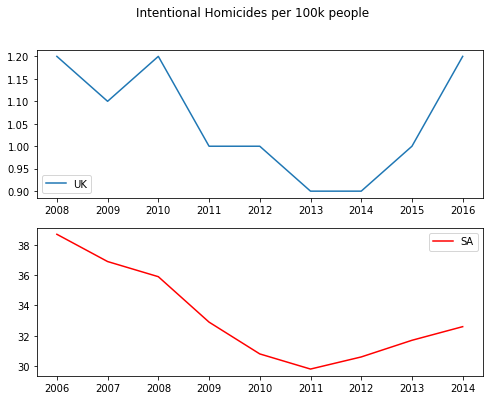

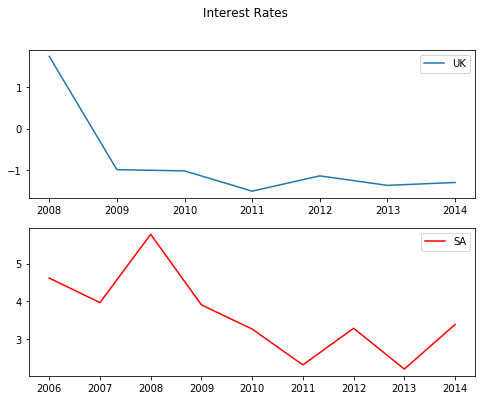

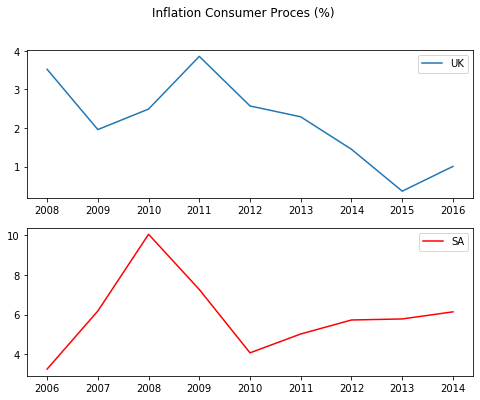

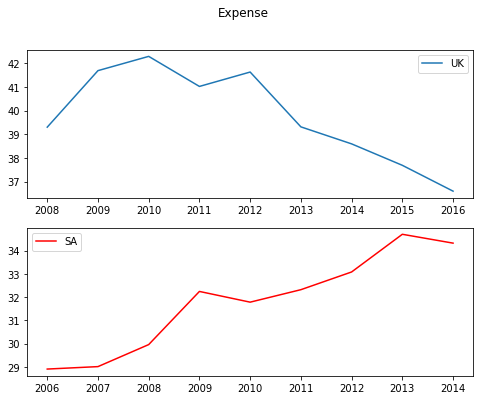

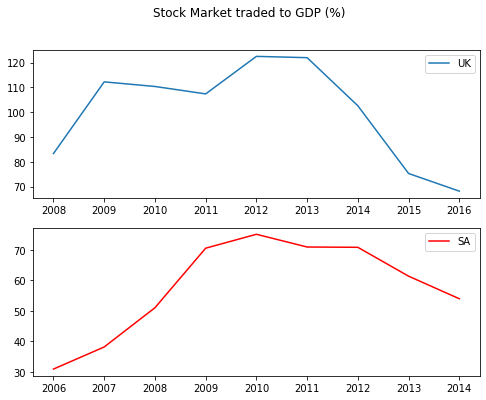

In [119]:
for column in ukColumns:
    if column == 'Year':
        next
    else:
        fig, axs = plt.subplots(2,figsize=(8,6))
        fig.suptitle(column)
        axs[0].plot(uk_df['Year'],uk_df[column],label='UK')
        axs[0].legend()
        axs[1].plot(sa_df['Year'],sa_df[column],'r-',label='SA')
        axs[1].legend()
        fig.savefig(f'{column}.png')